# Conexão com postgres e Relatorios do Sistema



## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [3]:

!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

     |████████████████████████████████| 3.4 MB 5.2 MB/s 


### Importando bibliotecas

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Usando psycopg2 para configurar conexão

In [5]:
conn = psycopg2.connect(host="motty.db.elephantsql.com",database="iifjfcmu", user="iifjfcmu", password="O2izvJBGgLsRrXojZHvYgWzk6c5k054m")

# Relatórios

## Relatório 1

### Objetivo: Obter relatório que mostre a quantidade de produtos por categoria.


Código para obtenção do resultado:


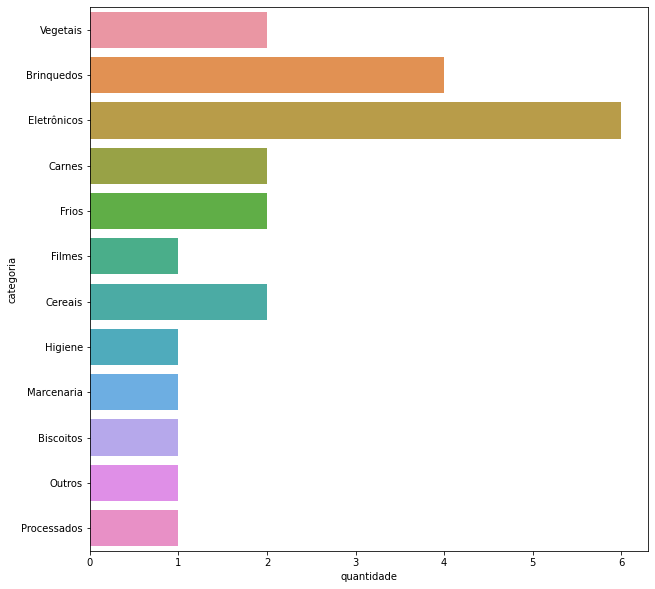

In [79]:
figure = plt.figure(figsize=(10, 10))
res = pd.read_sql_query("""
                          select count(produto) as quantidade, categoria.categoria as categoria from PRODUTO
                          inner join categoria
                          on(categoria.id = produto.id_categoria)
                          group by id_categoria, categoria.categoria order by id_categoria

                           """,conn)
res
sns.barplot(x='quantidade',y='categoria',data=res)


#========================================================


## Relatório 2


### Objetivo: Obter relatório que mostre a quantidade de dinheiro obtido por categoria



Código para obtenção do resultado:

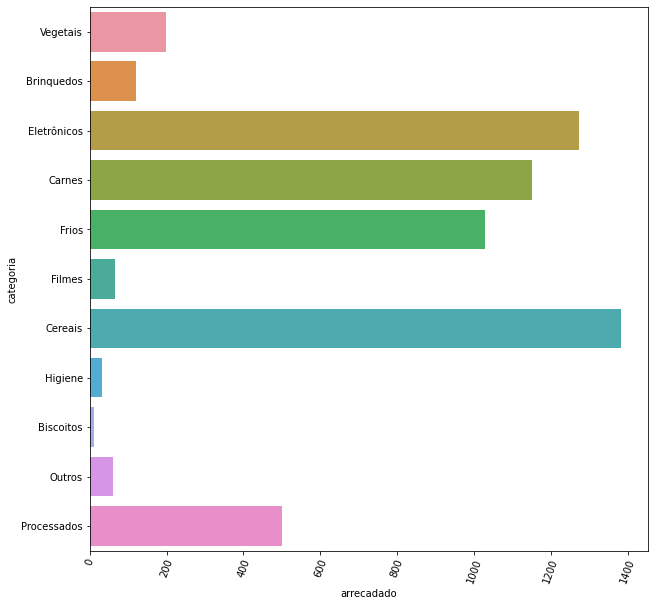

In [80]:
figure = plt.figure(figsize=(10, 10))
res = pd.read_sql_query("""select sum(pe.valor*pp.quantidade) as arrecadado, c.categoria as categoria from pedido_produto as pp
                            inner join produto as p
                            on(p.id = pp.id_produto)
                            inner join pedido as pe
                            on(pe.id = pp.id_pedido)
                            inner join categoria as c
                            on(c.id = p.id_categoria)
                            group by c.id order by c.id 
                            """,conn)
res
plt.xticks(rotation=70)
sns.barplot(x='arrecadado',y='categoria',data=res,)


# ============================================================


## Relatório 3


### Objetivo: Obter relatorio que mostre o dinheiro recebido durante todos os anos de atividade



Código para obtenção do resultado:

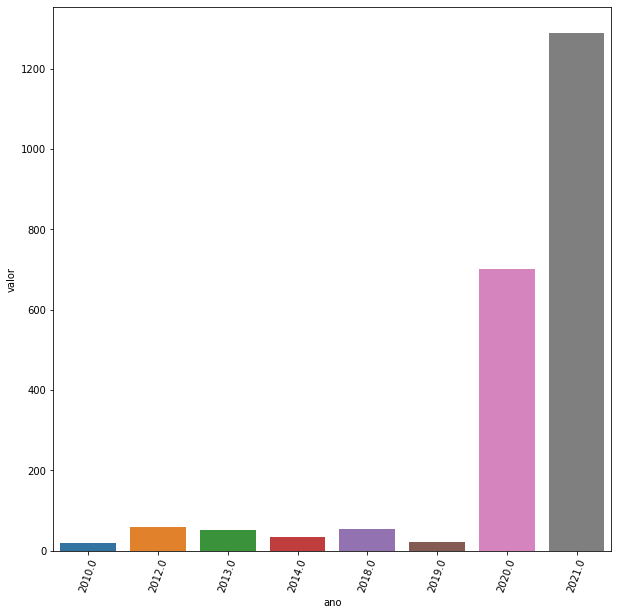

In [81]:
figure = plt.figure(figsize=(10, 10))
res = pd.read_sql_query("""
                  select date_part('year',data) as ano, sum(valor) as valor from pedido
                  group by ano order by ano
                  """,conn)
res
plt.xticks(rotation=70)
sns.barplot(x='ano',y='valor',data=res,)


# ============================================================

## Relatório 4


### Objetivo: Obter Relatório que mostre as informações relacionadas a todos empregados de empresa (sem excluir ninguém). As linhas resultantes devem conter informações sobre: rg, nome, salario do empregado, data de início do salario atual, nomes dos projetos que participa, quantidade de horas e localização nos referidos projetos, numero e nome dos departamentos aos quais está alocado, informações do historico de salário como inicio, fim, e valores de salarios antigos que foram inclusos na referida tabela (caso possuam informações na mesma), além de todas informações relativas aos dependentes. 



##### Observações: <br> a) perceba que este relatório pode conter linhas com alguns dados repetidos (mas não todos). <br>  b) para os empregados que não possuirem alguma destas informações o valor no registro deve aparecer sem informação/nulo. 



Código para obtenção do resultado:

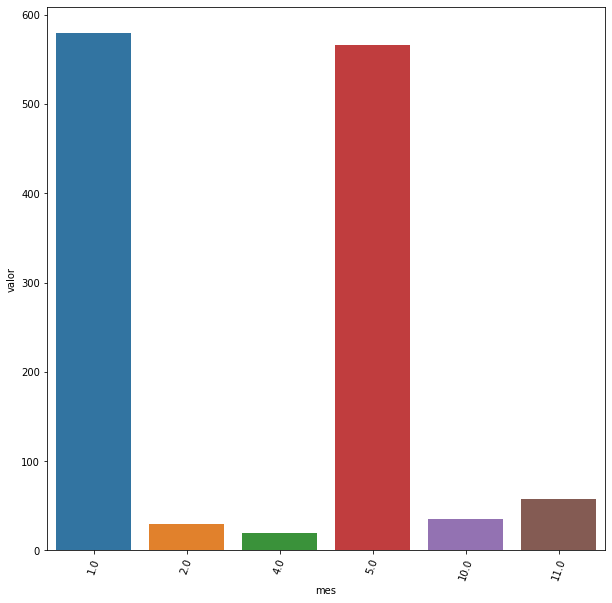

In [82]:
figure = plt.figure(figsize=(10, 10))
res = pd.read_sql_query("""
                            select date_part('month',data) as mes, sum(valor) as valor from pedido where date_part('year',data) = 2021
                            group by mes order by mes
                            """,conn)
res
plt.xticks(rotation=70)
sns.barplot(x='mes',y='valor',data=res,)


# ============================================================


## Relatório 5


### Objetivo: Obter a frequencia absoluta e  frequencia relativa da quantidade de cpfs únicos no relatório 4. Apresente os resultados ordenados de forma decrescente pela frequencia relativa.



Código para obtenção do resultado:

axes = figure.add_subplot(1, 1, 1)


axes.pie(
    valores,
    labels=nomes,
    explode=explode
)

plt.show()